# <center>**Encontrar Puntos Estacionarios de Forma Automática**</center>

## Función para encontrar puntos estacionarios de forma automática:

In [88]:
import numpy as np
from fractions import Fraction
import matplotlib.pyplot as plt
import sympy as sp

def encontrar_puntos_estacionarios(polinomio):
    # Define la ecuación polinómica y su título
    ecuacion = np.poly1d(polinomio)
    titulo_ecuacion = ecuacion_string(ecuacion)
    # Calcula la primera y segunda derivada del polinomio
    primer_derivada = np.polyder(ecuacion, 1)
    segunda_derivada = np.polyder(primer_derivada, 1)

    # Encuentra las raíces (puntos estacionarios) y sus valores correspondientes
    raices = np.roots(primer_derivada)
    valores = np.polyval(ecuacion, raices)

    # Etiquetas para los puntos estacionarios
    etiquetas = []

    # Clasificación de Puntos Estacionarios
    valores_etiquetas = np.polyval(segunda_derivada, raices)

    for i, valor in enumerate(valores):
        if valores_etiquetas[i] > 0:
            etiqueta = f"Mínimo en ({raices[i]:.2f}, {valor:.2f})"
        elif valores_etiquetas[i] < 0:
            etiqueta = f"Máximo en ({raices[i]:.2f}, {valor:.2f})"
        etiquetas.append(etiqueta)

    # Rango para x
    mayor = np.max(raices) + 0.5
    menor = np.min(raices) - 0.5

    # 100 puntos en x para evaluar
    x = np.linspace(menor, mayor, 100)

    # Valores de la función
    y = np.polyval(ecuacion, x)

    # Muestra la gráfica con título y etiquetas
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'r', label=titulo_ecuacion)
    plt.plot(raices, valores, '*g', markersize=10, label="Puntos Estacionarios")

    # Agrega etiquetas a los puntos estacionarios
    for i, etiqueta in enumerate(etiquetas):
        plt.annotate(etiqueta, (raices[i], valores[i]), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.legend()
    plt.title("Gráfica de la Ecuación: " + titulo_ecuacion)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

In [89]:
# Función para mostrar la ecuacion como string con un formato legible
def ecuacion_string(ecuacion):
  degree = len(ecuacion)
  str_eq = r'$'

  for i, coeff in enumerate(ecuacion):
    # Coeficiente
    if coeff != 0:
      # Primer coeficiente
      if i == 0:
        if coeff == -1:
          str_eq += '- '
        elif coeff < 0 and coeff != -1:
          str_eq += '- ' + str(abs(coeff))
        else:
          if coeff != 1:
            str_eq += str(coeff)
      else:
        # Negativos
        if coeff == -1:
          str_eq += ' - '
        elif coeff < 0 and coeff != -1:
           str_eq += ' - ' + str(abs(coeff))
        # Positivos
        if coeff == 1:
          str_eq += ' + '
        elif coeff > 1:
          str_eq += ' + ' + str(coeff)

      # Variable y exponente
      if i < degree:
        if degree - i > 1:
          str_eq += 'x^{' + str(degree - i) + '}'
        else:
           str_eq += 'x'

  str_eq += '$'

  return str_eq

## <center>1) y = x³ - 4x² + x + 6</center>

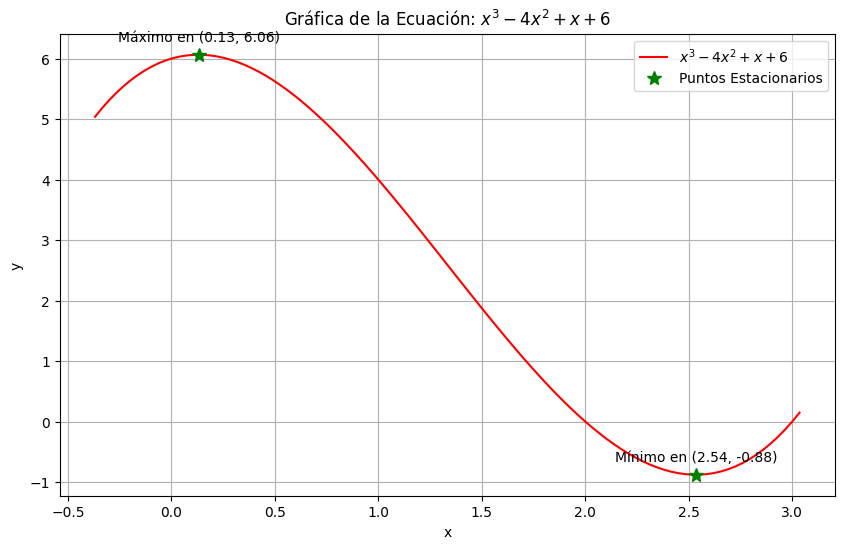

In [90]:
# Ejemplo de uso:
polinomio_ejemplo = [1, -4, 1, 6]
encontrar_puntos_estacionarios(polinomio_ejemplo)

## <center>2) y = 6x³ - 12x² + 5x - 2</center>

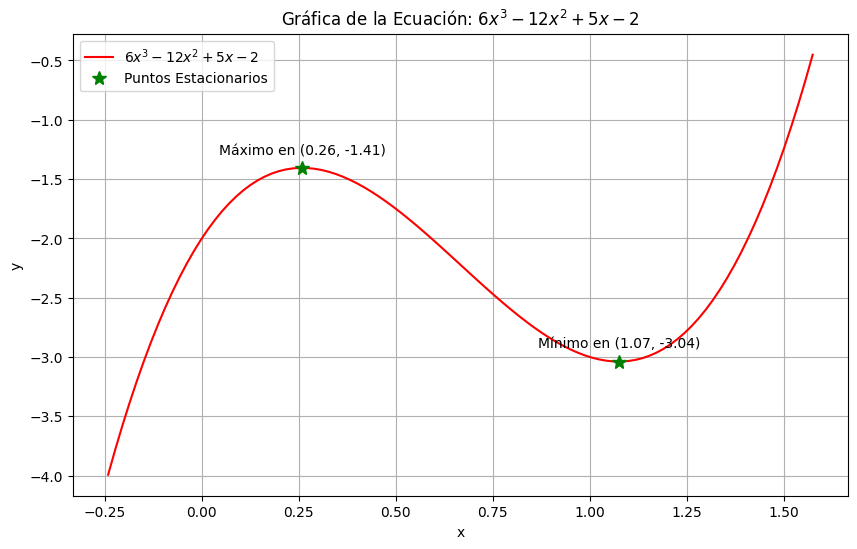

In [91]:
# Ejemplo de uso:
polinomio_ejemplo = [6, -12, 5, -2]
encontrar_puntos_estacionarios(polinomio_ejemplo)

## <center>3) y = (1/3)x³ + 8x² + 63x + 7</center>

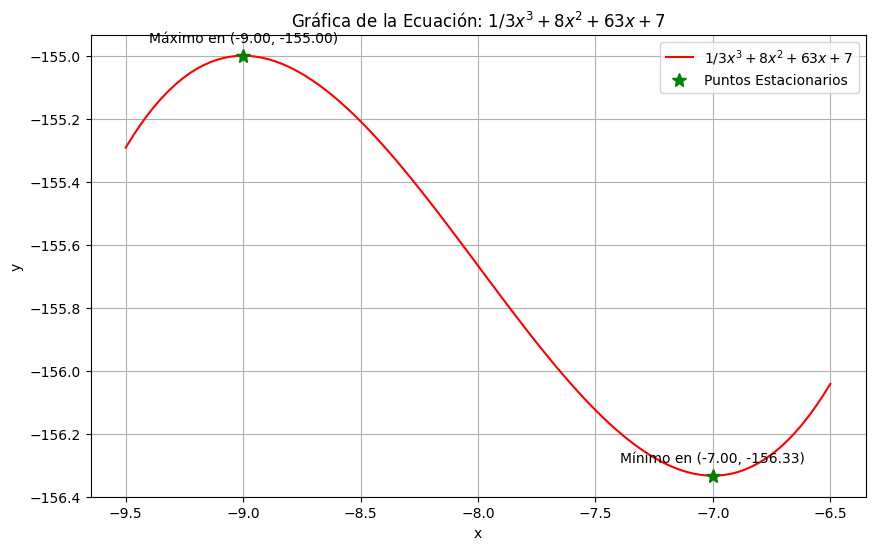

In [92]:
# Ejemplo de uso:
polinomio_ejemplo = [Fraction(1, 3), 8, 63, 7]
encontrar_puntos_estacionarios(polinomio_ejemplo)